# Create a data portal with 10years forecast on Nigeria Ammonia and CO2 emissions estimations.
•	Data cleansing and validation (Python or Tableau)
•	Analysis and Forecasting  (Python or Tableau)


# Outline¶

    Import Datasets
    Data Cleaning and Data Preparation
    Exploratory Data Analysis
    Feature Engineering
    Train Test Split
    Model Building
    Model Evaluation


In [2]:
# Import Libraries for Analysis
import numpy as np
import pandas as pd

# Import Libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import libraries for train test split
from sklearn.model_selection import train_test_split

# import Ilbrary for Scaling
from sklearn.preprocessing import StandardScaler

# import Ilbrary for Model Building
from sklearn.linear_model import LinearRegression

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing the data set

In [3]:
import os

In [4]:
pwd

'C:\\Users\\USER'

In [6]:
# Import the data set
df = pd.read_csv("C:\\Users\\USER\\Maindataset.csv")

In [7]:
# Print top 5 rows of dataset
df.head()

,Category,Buildings,Noncombustion,Otherindustrialcombustion,PowerIndustry,Transport,TotalCO2percap
0,2010,6838174,34745256,11418698,9967401,27549530,0.57
1,2011,6914112,34442161,18398502,10676049,24746903,0.58
2,2012,8114295,27318548,18089633,11633126,25451663,0.54
3,2013,8630828,27963839,17340022,11890567,23952755,0.52
4,2014,8039586,25604513,18124172,12641126,21292626,0.49


# Data Cleaning and Preparation

In [8]:
# Check the info of data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Category                   10 non-null     int64  
 1   Buildings                  10 non-null     int64  
 2   Noncombustion              10 non-null     int64  
 3   Otherindustrialcombustion  10 non-null     int64  
 4   PowerIndustry              10 non-null     int64  
 5   Transport                  10 non-null     int64  
 6   TotalCO2percap             10 non-null     float64
dtypes: float64(1), int64(6)
memory usage: 688.0 bytes


In [9]:
# Check column names
df.columns

Index(['Category', 'Buildings', 'Noncombustion', 'Otherindustrialcombustion',
       'PowerIndustry', 'Transport', 'TotalCO2percap'],
      dtype='object')

In [10]:
# Check Null Values in data set
df.isnull().sum()

Category                     0
Buildings                    0
Noncombustion                0
Otherindustrialcombustion    0
PowerIndustry                0
Transport                    0
TotalCO2percap               0
dtype: int64

In [11]:
# Value_counts for Category
df.Category.value_counts()

2016    1
2017    1
2018    1
2019    1
2010    1
2011    1
2012    1
2013    1
2014    1
2015    1
Name: Category, dtype: int64

In [12]:
# Value_counts for Buildings
df.Buildings.value_counts()

6914112    1
8039586    1
8134190    1
9058874    1
8114295    1
8604138    1
8525771    1
8630828    1
9421303    1
6838174    1
Name: Buildings, dtype: int64

In [14]:
# Value_counts for Non-combustion
df["Noncombustion"].value_counts()

25604513    1
34442161    1
24987839    1
27380904    1
27318548    1
25147111    1
34745256    1
27205754    1
27427052    1
27963839    1
Name: Noncombustion, dtype: int64

In [15]:
# Value_counts for Other industrial combustion
df["Otherindustrialcombustion"].value_counts()

18089633    1
19057571    1
18613636    1
18398502    1
17340022    1
20688986    1
11418698    1
20164166    1
18124172    1
18770470    1
Name: Otherindustrialcombustion, dtype: int64

In [16]:
# Value_counts for Power Industry
df["PowerIndustry"].value_counts()

10676049    1
14236833    1
13888636    1
11633126    1
11890567    1
12976264    1
9967401     1
12784689    1
12641126    1
13113885    1
Name: PowerIndustry, dtype: int64

In [17]:
# Value_counts for Transport
df.Transport.value_counts()

28449057    1
21292626    1
23952755    1
24562458    1
24746903    1
25981624    1
27549530    1
27354731    1
25744946    1
25451663    1
Name: Transport, dtype: int64

In [19]:
# Value_counts for Total CO2percap
df["TotalCO2percap"].value_counts()

0.49    4
0.50    2
0.54    1
0.58    1
0.57    1
0.52    1
Name: TotalCO2percap, dtype: int64

### VISUALIZATIONS

In [20]:
df.describe()

,Category,Buildings,Noncombustion,Otherindustrialcombustion,PowerIndustry,Transport,TotalCO2percap
count,10.00000,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,10.000000
mean,2014.50000,8.228127e+06,2.822230e+07,1.806659e+07,1.238086e+07,2.550863e+07,0.517000
std,3.02765,8.314571e+05,3.516063e+06,2.536181e+06,1.348717e+06,2.059482e+06,0.034657
min,2010.00000,6.838174e+06,2.498784e+07,1.141870e+07,9.967401e+06,2.129263e+07,0.490000
25%,2012.25000,8.058263e+06,2.600482e+07,1.809827e+07,1.169749e+07,2.460857e+07,0.490000
50%,2014.50000,8.329980e+06,2.734973e+07,1.850607e+07,1.271291e+07,2.559830e+07,0.500000
75%,2016.75000,8.624156e+06,2.782964e+07,1.898580e+07,1.307948e+07,2.701145e+07,0.535000
max,2019.00000,9.421303e+06,3.474526e+07,2.068899e+07,1.423683e+07,2.844906e+07,0.580000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Category                   10 non-null     int64  
 1   Buildings                  10 non-null     int64  
 2   Noncombustion              10 non-null     int64  
 3   Otherindustrialcombustion  10 non-null     int64  
 4   PowerIndustry              10 non-null     int64  
 5   Transport                  10 non-null     int64  
 6   TotalCO2percap             10 non-null     float64
dtypes: float64(1), int64(6)
memory usage: 688.0 bytes


### distribution of CO2 emissions

In [22]:
categories = df.columns[1:-1]

In [23]:
sum_values = df[categories].sum().values

In [24]:
sum_values

array([ 82281271, 282222977, 180665856, 123808576, 255086293], dtype=int64)

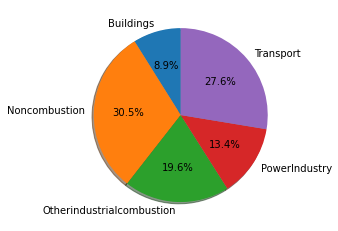

In [25]:
plt.pie(sum_values, labels=categories, autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

### bar chart

In [26]:
years = df["Category"].values

In [27]:
n_years = len(years)

In [28]:
9%5

4

In [29]:
categories

Index(['Buildings', 'Noncombustion', 'Otherindustrialcombustion',
       'PowerIndustry', 'Transport'],
      dtype='object')

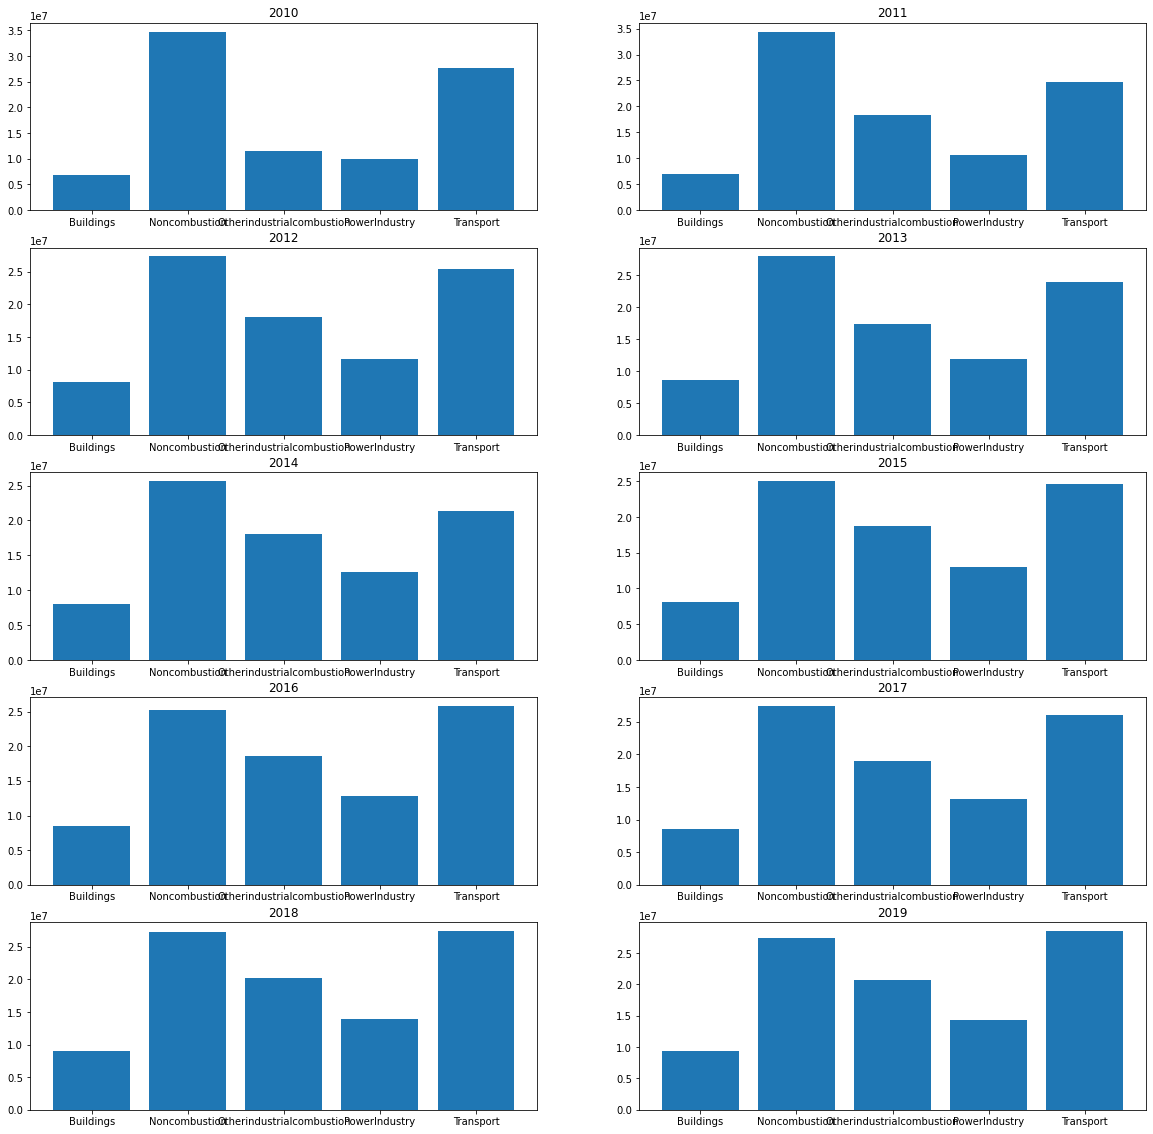

In [30]:
fig, ax = plt.subplots(5,2, figsize=(20,20))

for i in range(n_years):
    year = years[i]
    year_data = df[df["Category"] == year][categories].values[0]
    a = (i//2)
    b = (i % 2)
    ax[a, b].bar(categories, year_data)
    ax[a,b].set_xticklabels(categories)
    ax[a,b].set_title(year)

### Line Graph

In [31]:
years = df["Category"].values

In [32]:
n_category = len(categories)

In [33]:
n_category

5

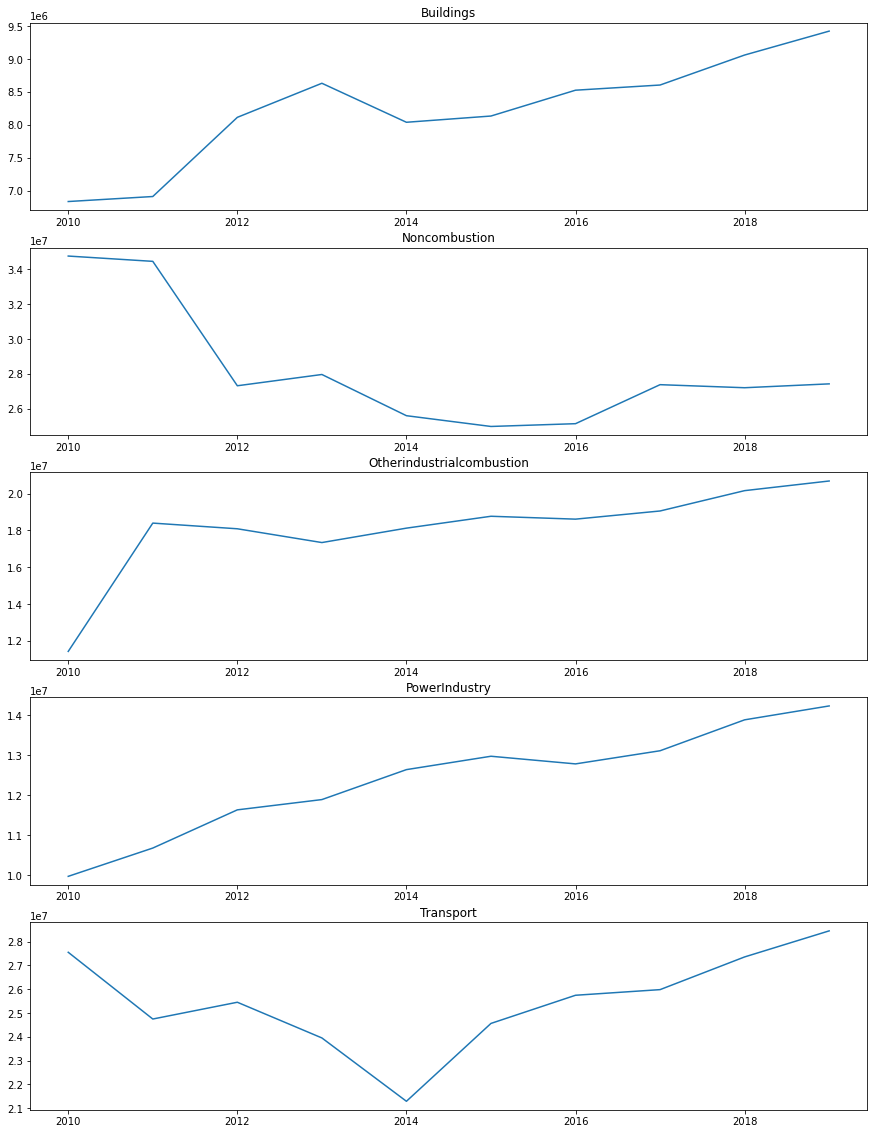

In [34]:
fig, ax = plt.subplots(5, figsize=(15, 20))

for i in range(5):
    category_type = categories[i]
    data = df[category_type].values
    ax[i].plot(years, data)
    ax[i].set_title(category_type)


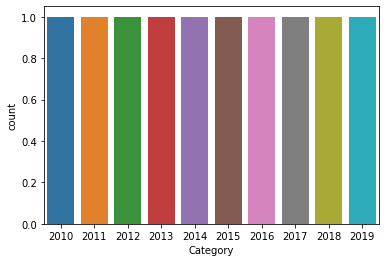

In [22]:
sns.countplot(x="Category", data=df);

In [32]:
df["Buildings"].min()

6838174

In [33]:
df["Buildings"].max()

9421303

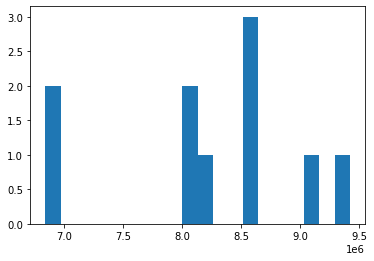

In [100]:
plt.hist(df.Buildings, bins=20);

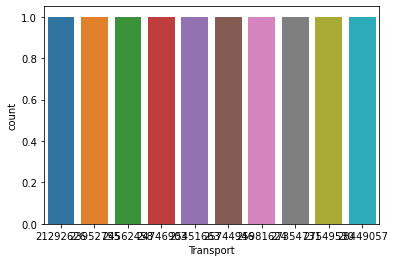

In [101]:
sns.countplot(x="Transport", data=df);

In [102]:
df.corr()

,Category,Buildings,Noncombustion,Otherindustrialcombustion,PowerIndustry,Transport,TotalCO2percap
Category,1.000000,0.893575,-0.653770,0.760397,0.970509,0.335422,-0.810068
Buildings,0.893575,1.000000,-0.739933,0.729188,0.915554,0.241260,-0.782089
Noncombustion,-0.653770,-0.739933,1.000000,-0.626664,-0.773638,0.272907,0.921454
Otherindustrialcombustion,0.760397,0.729188,-0.626664,1.000000,0.819506,-0.030182,-0.600963
PowerIndustry,0.970509,0.915554,-0.773638,0.819506,1.000000,0.168038,-0.867559
Transport,0.335422,0.241260,0.272907,-0.030182,0.168038,1.000000,0.144864
TotalCO2percap,-0.810068,-0.782089,0.921454,-0.600963,-0.867559,0.144864,1.000000


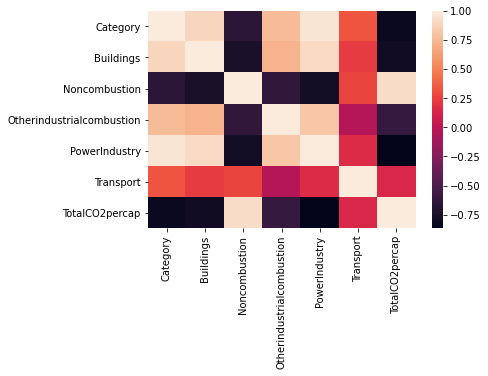

In [103]:
sns.heatmap(df.corr());

# Feature Engineering

In [ ]:
sns.set(style="whitegrid")
print(df['Total CO2/cap'].value_counts())
fig = plt.figure(figsize = (10,6))
sns.countplot('Total CO2/cap', data=df, palette='gist_heat')
plt.show()

In [ ]:

X=df.drop(["Total CO2/cap"],axis=1)
Y=df["Total CO2/cap"]

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0) 

#Feature Scaling
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [ ]:
predicted =[]
for name,algo in models.items():
    model=algo
    model.fit(X_train,y_train)
    predict = model.predict(X_test)
    #cm=confusion_matrix(predict,y_test)
  

    acc = accuracy_score(y_test, predict)
    predicted.append(acc)
    print(name,acc)
